In [1]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import random
from datetime import datetime

with open('crawler_results.json', 'r') as f:
    data = json.load(f)


In [2]:
# used to confirm number of nodes by counting unique instances of each item
unique_items = set()

# list of keys to capture
links = ['Owners', 'Owner Name',
         'Commercial Registered Agent', 'Registered Agent']

# initialize nx graph. will collect edges (node <> node relationships) for eventual graphing
graph = nx.Graph()

for link in links:
    for item in data:
        # capture business name
        business_name = item['business'][1]['Business Info']['TITLE'][0].split('\n')[
            0]

        try:
            # capture respective info (iterating through links[])
            info = item['additional_information']['DRAWER_DETAIL_LIST'][link].split('\n')[
                0]

            # add captured business name, info to previously initialized graph as edge
            graph.add_edge(business_name, info)

            # Count number of unique items added to graph
            unique_items.update([business_name, info])

        except:
            pass

assert len(graph.nodes()) == len(unique_items)


In [5]:
"""
Create graph

"""


def create_connection_graph(node_count: int, labels=False):
    i = 0
    date_today = datetime.today().strftime('%Y-%m-%d')
    connections = []
    # GraphMatcher = nx.isomorphism.vf2userfunc.GraphMatcher

    if labels:
        plt.figure(1, figsize=(25, 25))
    else:
        plt.figure(1, figsize=(10, 10))

    # layout graphs with positions using graphviz neato
    pos = nx.nx_agraph.graphviz_layout(graph, prog="neato")

    # color nodes the same in each connected subgraph
    C = (graph.subgraph(c) for c in nx.connected_components(graph))
    for g in C:
        if len(g.nodes()) > node_count:
            connections.append(g.edges())
            c = [random.random()] * nx.number_of_nodes(g)  # random color...
            edge_labels = nx.get_edge_attributes(g, 'label')

            nx.draw(g, pos, node_size=100, node_color=c, vmin=0.0, vmax=1.0,
                    with_labels=labels, bbox=dict(facecolor="lightgrey"))
            i += 1
            
    plt.title(f'Graph Generated on {date_today}. \n There are {i} Edges with a Node Count Greater than {node_count}.')
    plt.savefig(
        f'entity_connections_{node_count}_node_min_labels_{labels}.png', 
        bbox_inches='tight')
    plt.show()


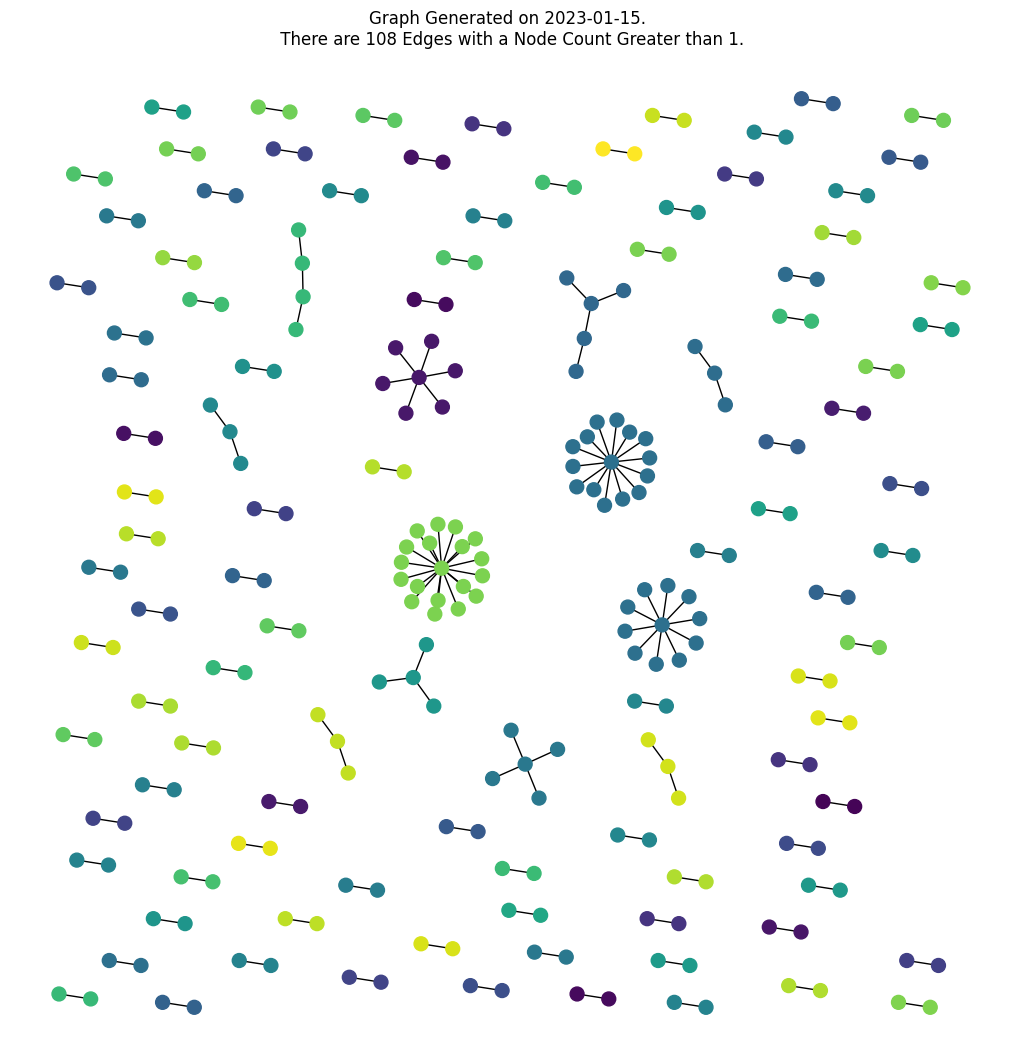

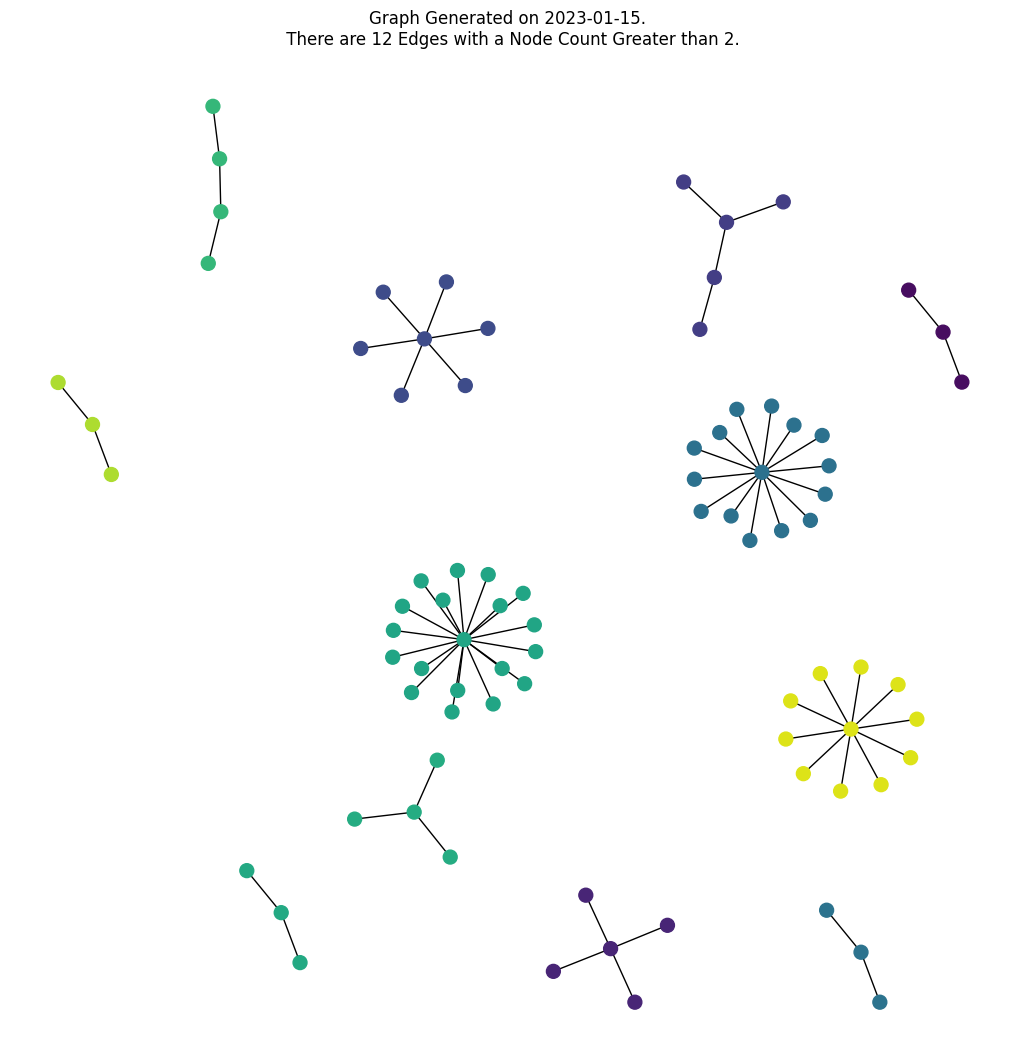

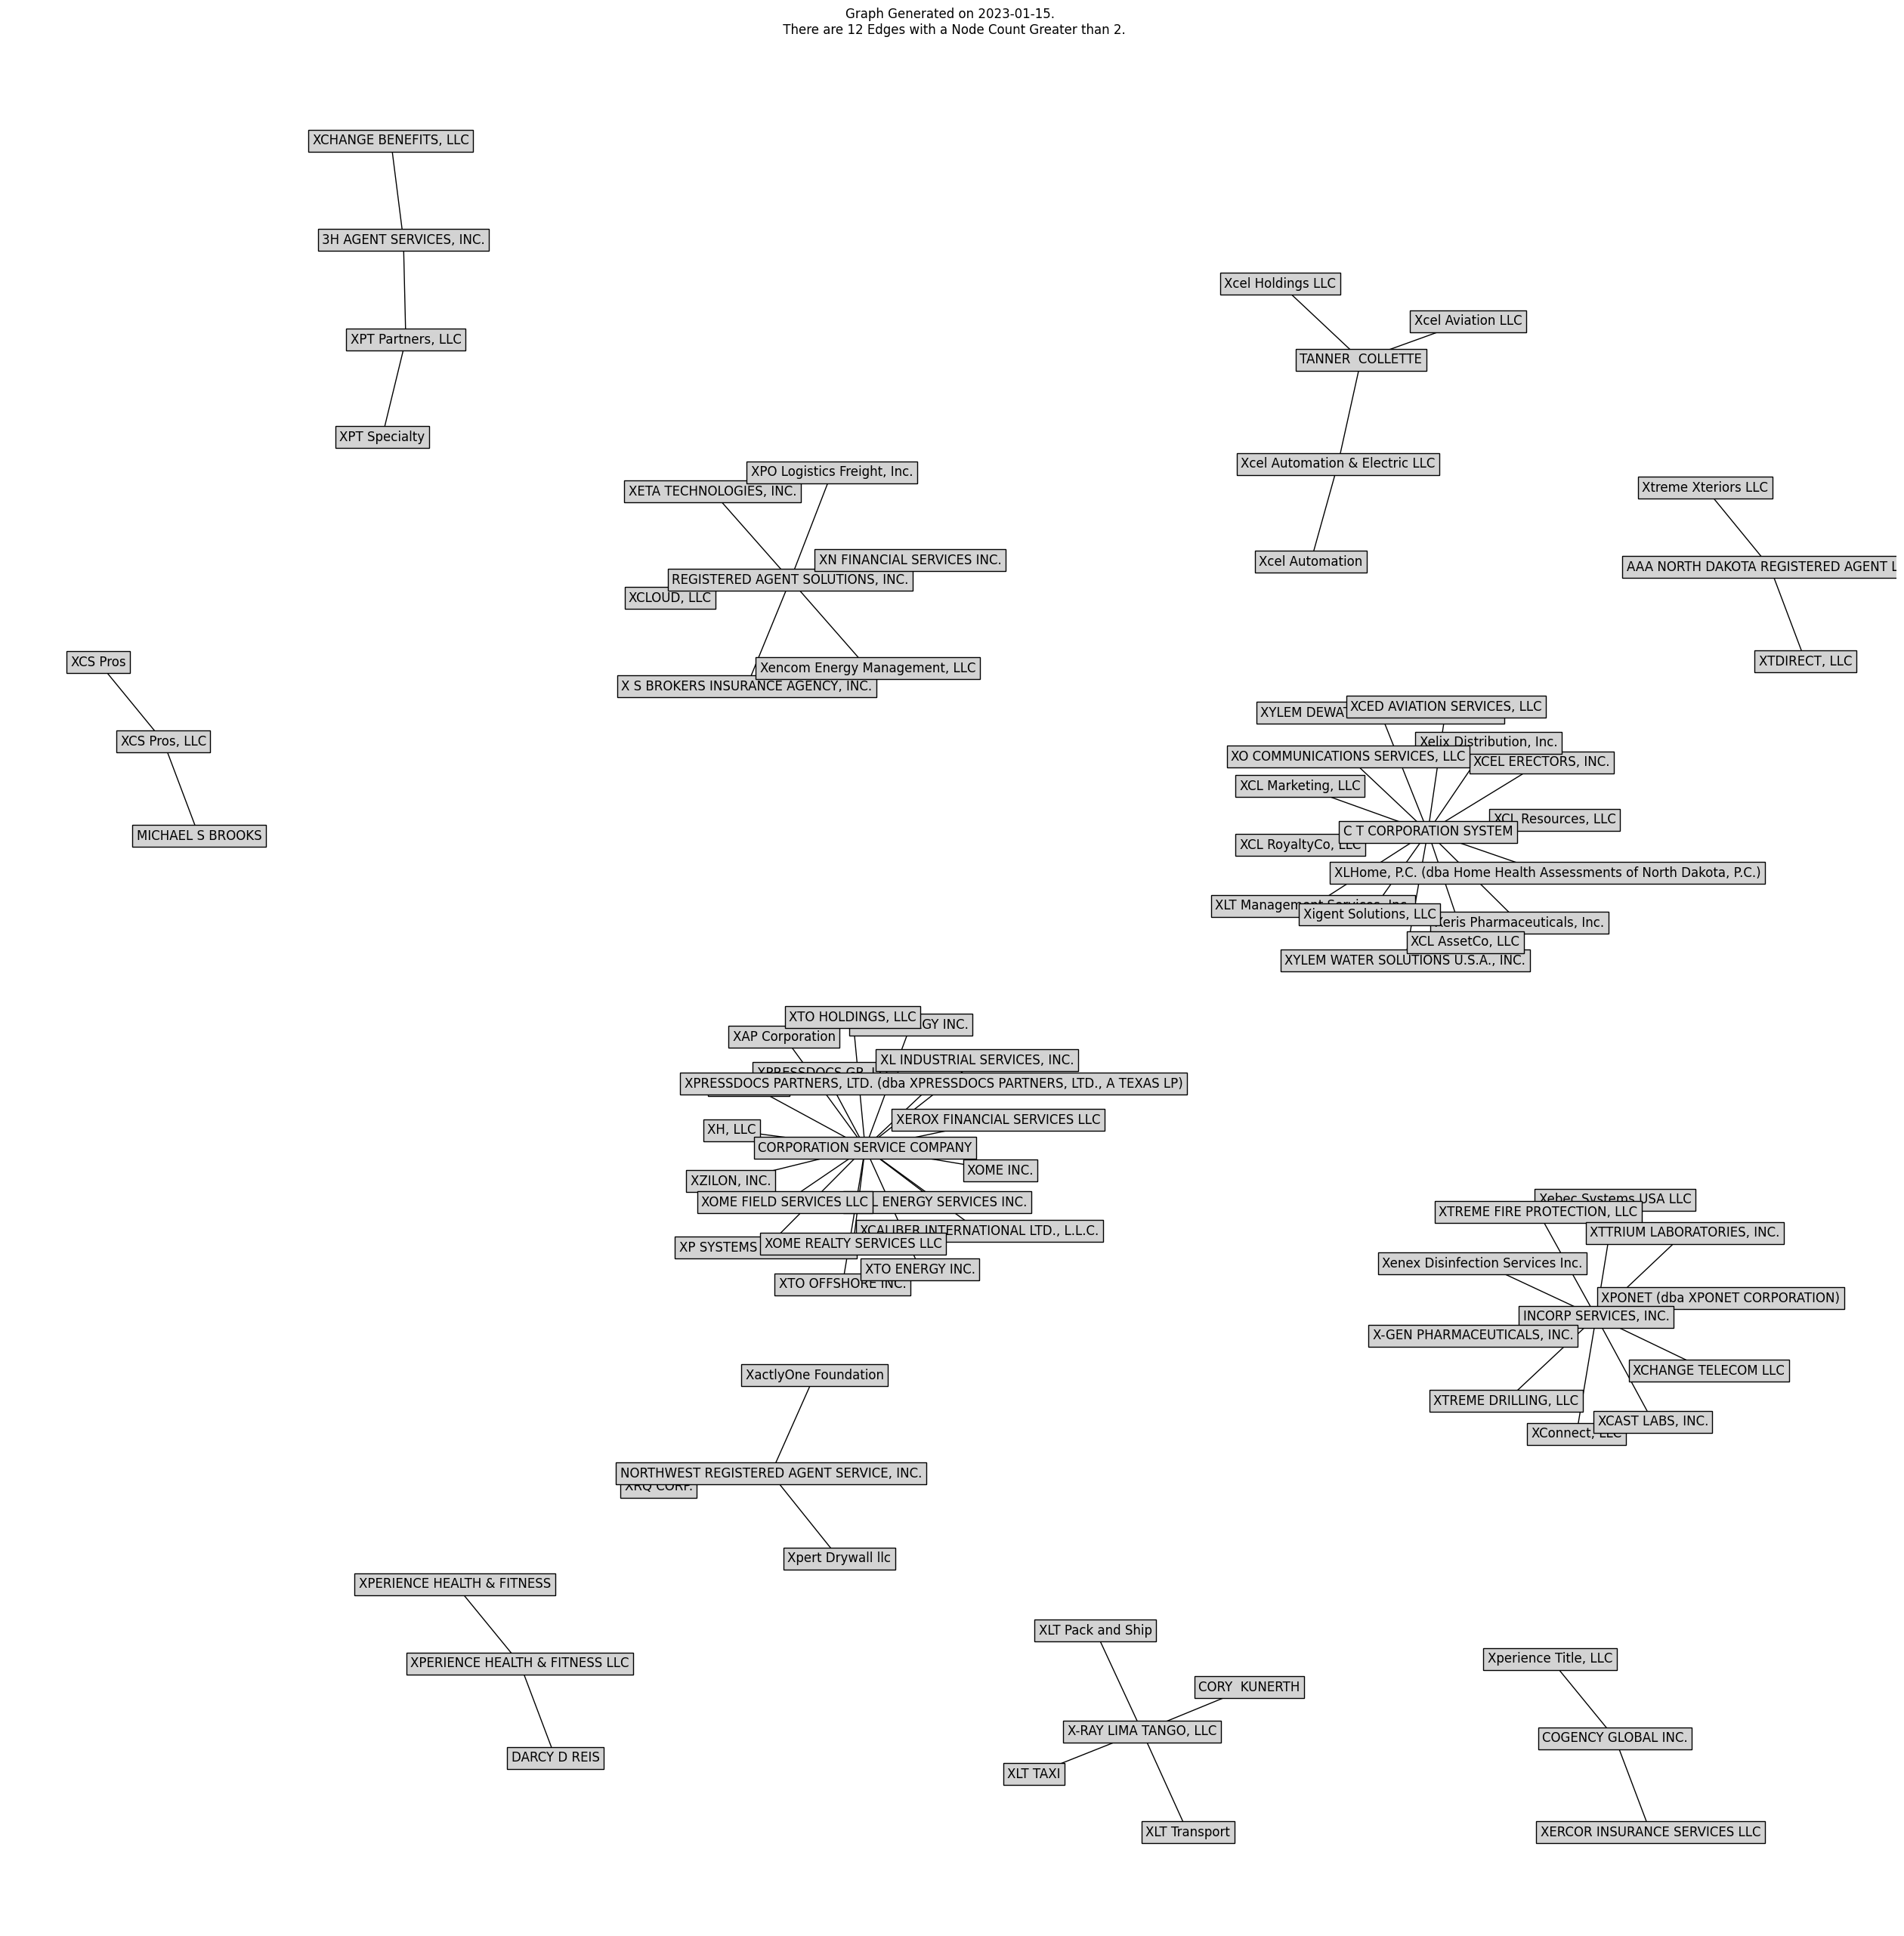

In [6]:
create_connection_graph(1, labels=False)
create_connection_graph(2, labels=False)
create_connection_graph(2, labels=True)